In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.shape

(1025, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

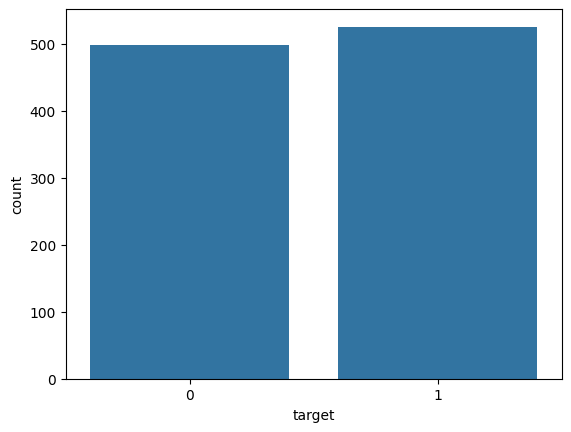

In [9]:
sns.countplot(data=df, x = df["target"])

In [10]:
df["sex"].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [14]:
X = df.drop(columns="target", axis=1)
Y = df["target"]

In [15]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [16]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
845,56,1,0,132,184,0,0,105,1,2.1,1,1,1
542,62,0,0,140,394,0,0,157,0,1.2,1,0,2
147,41,1,0,110,172,0,0,158,0,0.0,2,0,3
711,35,1,0,120,198,0,1,130,1,1.6,1,0,3
724,74,0,1,120,269,0,0,121,1,0.2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,63,0,0,150,407,0,0,154,0,4.0,1,3,3
563,44,1,0,112,290,0,0,153,0,0.0,2,1,2
654,41,0,1,126,306,0,1,163,0,0.0,2,0,2
943,65,1,0,120,177,0,1,140,0,0.4,2,0,3


In [19]:
Y_test

845    0
542    1
147    0
711    0
724    1
      ..
889    0
563    0
654    1
943    1
734    0
Name: target, Length: 205, dtype: int64

In [20]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0
586,64,1,2,125,309,0,1,131,1,1.8,1,0,3
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2
462,52,1,3,118,186,0,0,190,0,0.0,1,0,1
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,63,1,0,130,254,0,0,147,0,1.4,1,1,3
906,42,1,0,140,226,0,1,178,0,0.0,2,0,2
1002,66,1,0,112,212,0,0,132,1,0.1,2,1,2
966,58,1,0,128,259,0,0,130,1,3.0,1,2,3


In [21]:
Y_train

14      0
586     0
16      1
462     1
186     0
       ..
221     0
906     1
1002    0
966     0
191     1
Name: target, Length: 820, dtype: int64

In [22]:
print(X_train.shape, X_test.shape)

(820, 13) (205, 13)


In [25]:
lr=LogisticRegression(max_iter = 1000)

In [26]:
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [28]:
from sklearn.metrics import accuracy_score

prediction_on_y = lr.predict(X_test)
accuracy_on_prd = accuracy_score(prediction_on_y, Y_test)

print("Accuracy score on testing set : ", accuracy_on_prd)

Accuracy score on testing set :  0.8146341463414634


In [29]:
prediction_on_x = lr.predict(X_train)
accuracy_on_pred = accuracy_score(prediction_on_x, Y_train)

print("Accuracy score on training set : ", accuracy_on_pred)

Accuracy score on training set :  0.8585365853658536


In [43]:
import warnings
warnings.filterwarnings('ignore')

input = (56,1,0,132,184,0,0,105,1,2.1,1,1,1)

input_into_array = np.asarray(input)

input_into_array_reshape = input_into_array.reshape(1,-1)

prediction = lr.predict(input_into_array_reshape)

print(prediction)

[0]


In [31]:
scaler = MinMaxScaler()

In [32]:
x_new = scaler.fit_transform(X)

In [33]:
x_new

array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.4375    , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [34]:
x = pd.DataFrame(x_new, columns=X.columns)

In [35]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667


In [36]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.2, stratify=Y, random_state=2)

In [38]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,0.479167,1.0,0.000000,0.320755,0.178082,1.0,0.5,0.648855,1.0,0.161290,0.5,0.00,0.000000
586,0.729167,1.0,0.666667,0.292453,0.417808,0.0,0.5,0.458015,1.0,0.290323,0.5,0.00,1.000000
16,0.458333,0.0,0.666667,0.433962,0.415525,0.0,0.0,0.541985,0.0,0.241935,1.0,0.25,0.666667
462,0.479167,1.0,1.000000,0.226415,0.136986,0.0,0.0,0.908397,0.0,0.000000,0.5,0.00,0.333333
186,0.229167,1.0,0.000000,0.150943,0.093607,0.0,0.0,0.328244,1.0,0.322581,0.5,0.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.708333,1.0,0.000000,0.339623,0.292237,0.0,0.0,0.580153,0.0,0.225806,0.5,0.25,1.000000
906,0.270833,1.0,0.000000,0.433962,0.228311,0.0,0.5,0.816794,0.0,0.000000,1.0,0.00,0.666667
1002,0.770833,1.0,0.000000,0.169811,0.196347,0.0,0.0,0.465649,1.0,0.016129,1.0,0.25,0.666667
966,0.604167,1.0,0.000000,0.320755,0.303653,0.0,0.0,0.450382,1.0,0.483871,0.5,0.50,1.000000


In [39]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
845,0.562500,1.0,0.000000,0.358491,0.132420,0.0,0.0,0.259542,1.0,0.338710,0.5,0.25,0.333333
542,0.687500,0.0,0.000000,0.433962,0.611872,0.0,0.0,0.656489,0.0,0.193548,0.5,0.00,0.666667
147,0.250000,1.0,0.000000,0.150943,0.105023,0.0,0.0,0.664122,0.0,0.000000,1.0,0.00,1.000000
711,0.125000,1.0,0.000000,0.245283,0.164384,0.0,0.5,0.450382,1.0,0.258065,0.5,0.00,1.000000
724,0.937500,0.0,0.333333,0.245283,0.326484,0.0,0.0,0.381679,1.0,0.032258,1.0,0.25,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,0.708333,0.0,0.000000,0.528302,0.641553,0.0,0.0,0.633588,0.0,0.645161,0.5,0.75,1.000000
563,0.312500,1.0,0.000000,0.169811,0.374429,0.0,0.0,0.625954,0.0,0.000000,1.0,0.25,0.666667
654,0.250000,0.0,0.333333,0.301887,0.410959,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667
943,0.750000,1.0,0.000000,0.245283,0.116438,0.0,0.5,0.526718,0.0,0.064516,1.0,0.00,1.000000


In [40]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_pred, Y_test)

print("Accuracy score on testing set : ", acc)

Accuracy score on testing set :  0.8195121951219512


In [42]:
train_pred = model.predict(X_train)
acc = accuracy_score(train_pred, Y_train)

print("Accuracy score on training set : ", acc)

Accuracy score on training set :  0.8621951219512195
